In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.graph_objs as go
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Functions

Function to find the optimal number of clusters using elbow method

In [25]:
def elbowOptimizer(data):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

Function to find the optimal number of clusters using Silhoette Score

In [19]:
def shsr(data):

    range_n_clusters = list(range(2, 10))
    silhouette_avg_scores = []
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters,init='k-means++', random_state= None)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data,cluster_labels)
        silhouette_avg_scores.append(silhouette_avg)
        print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")
    plt.figure(figsize=(10, 6))
    plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Average Silhouette Score')
    plt.title('Silhouette Scores for Various Numbers of Clusters')
    plt.grid(True)
    plt.show()

Function for Training K-Means Model on Given Data

In [28]:
def kmeansTrainer(numberOfClusters, data):

    kmeans = KMeans(n_clusters=numberOfClusters, init='k-means++', random_state=None)
    labels = kmeans.fit_predict(data)
    return (kmeans,labels)

Function for visualising 2-d Clusters

In [103]:
def clusterVisualiser(data, model, noOfClusters, labels, xlabel, ylabel):
    colors = ['#FF6347', '#3CB371', '#4682B4', '#FFD700', '#EE82EE', '#8A2BE2', '#FF4500', '#00CED1']

    plt.figure(figsize=(10, 6))

    for i in range(0, noOfClusters):
        plt.scatter(data[labels == i, 0], data[labels == i, 1],
                    s=200, c=colors[i % len(colors)], label='Cluster ' + str(i + 1), alpha=0.6, edgecolor='k', linewidth=0.5)

    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
                s=300, c='yellow', label='Centroids', edgecolor='black', linewidth=1, marker='X')

    plt.title('Clusters of Customers using KMeans Clustering', fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    plt.legend()
    plt.show()


## Data Exploration

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Checking for null values

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Text(0, 0.5, 'Count')

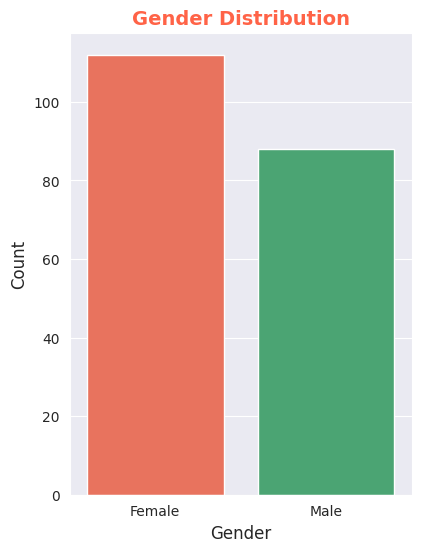

In [102]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
colors = ['#FF6347', '#3CB371', '#4682B4']

plt.figure(1, figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=genders.index, y=genders.values, palette=colors[:2])
plt.title('Gender Distribution', fontsize=14, fontweight='bold', color='#FF6347')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

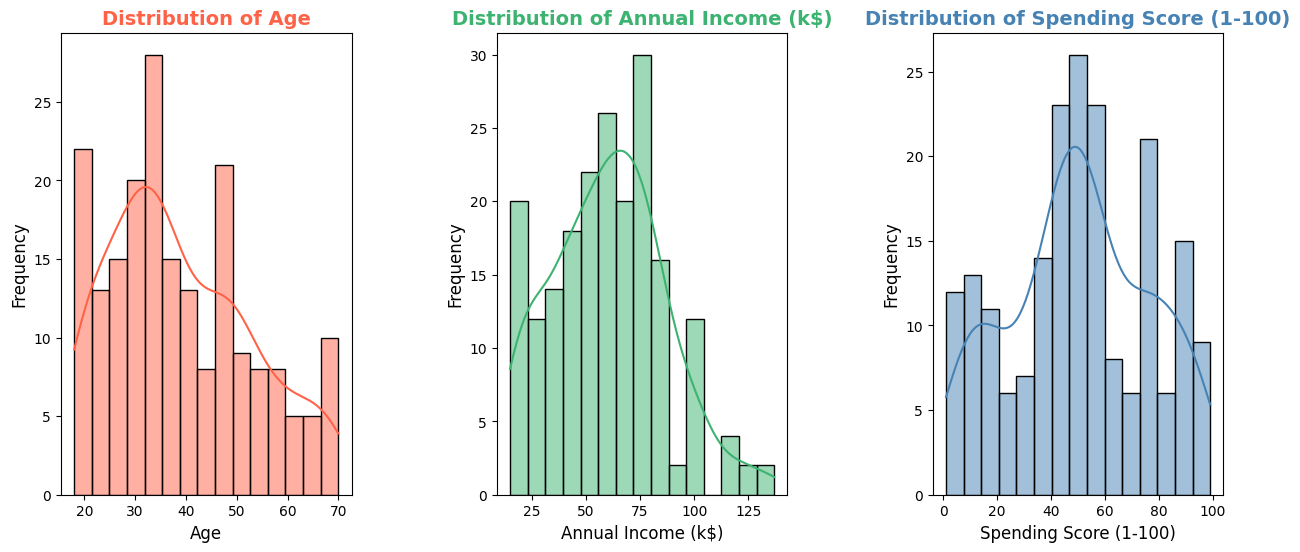

In [13]:
plt.figure(1, figsize=(15, 6))
n = 0
colors = ['#FF6347', '#3CB371', '#4682B4']
for x, color in zip(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], colors):
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df[x], bins=15, kde=True, color=color)
    plt.title('Distribution of {}'.format(x), fontsize=14, fontweight='bold', color=color)
    plt.xlabel(x, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
plt.show()

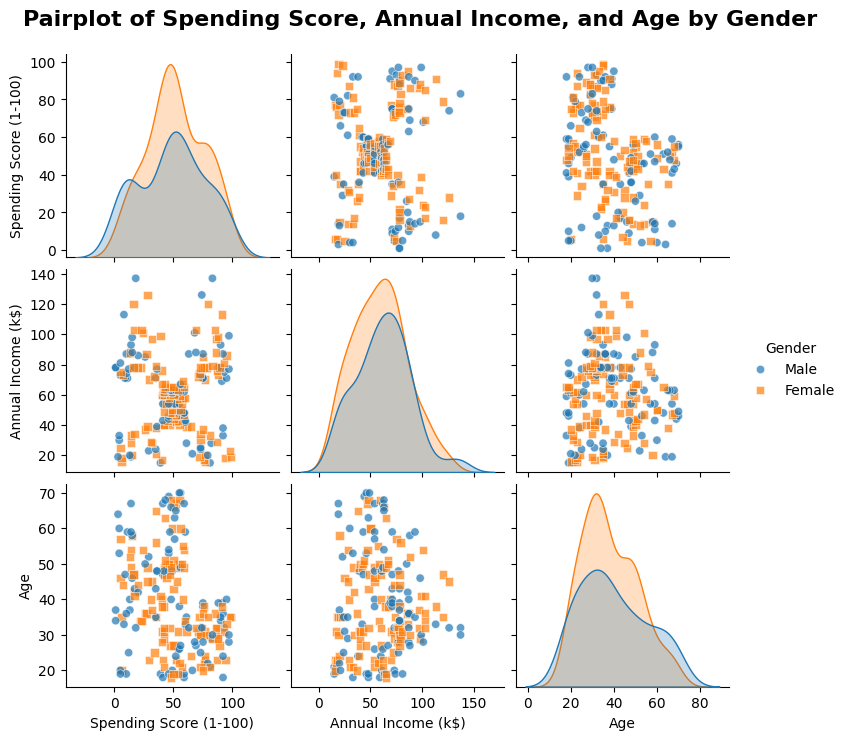

In [14]:
palette = {'Male': '#1f77b4', 'Female': '#ff7f0e'}
markers = ['o', 's']

pairplot = sns.pairplot(df, vars=['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue='Gender',
                        palette=palette, markers=markers, diag_kind='kde', plot_kws={'alpha':0.7})

pairplot.fig.suptitle('Pairplot of Spending Score, Annual Income, and Age by Gender', fontsize=16, fontweight='bold')
pairplot.fig.subplots_adjust(top=0.92)

plt.show()

## 2D Clustering based on Age and Spending Score

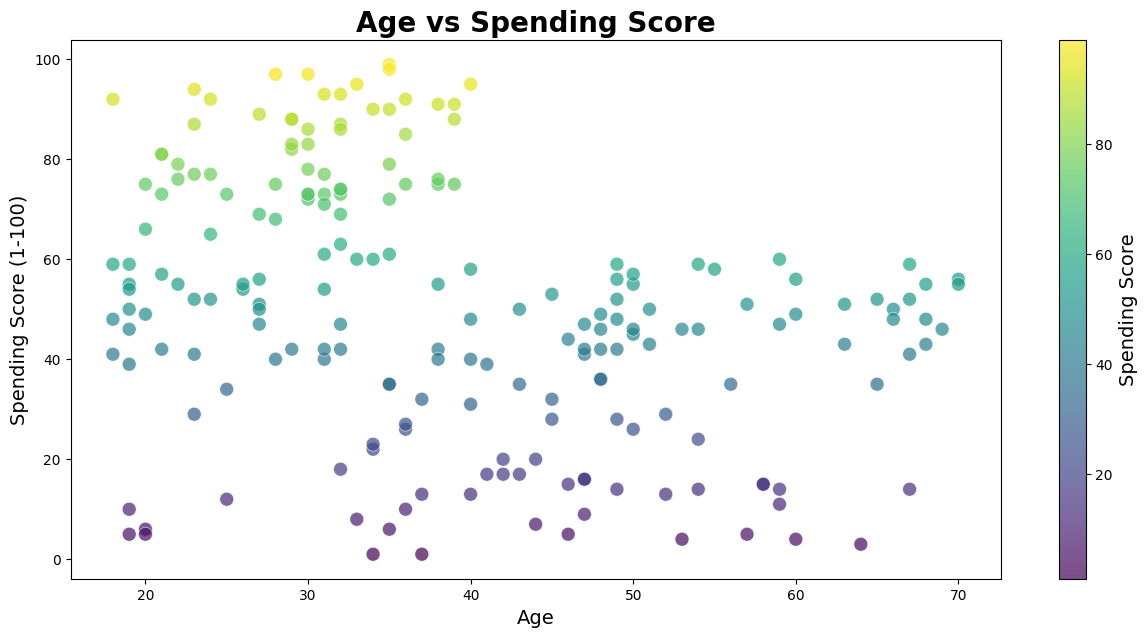

In [45]:
plt.figure(1, figsize=(15, 7))
plt.title('Age vs Spending Score', fontsize=20, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)

plt.scatter(x='Age', y='Spending Score (1-100)', data=df, s=100, c=df['Spending Score (1-100)'],
            cmap='viridis', alpha=0.7, edgecolor='w', linewidth=0.5)
cbar = plt.colorbar()
cbar.set_label('Spending Score', fontsize=14)

plt.show()

 Deciding K value

In [22]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values

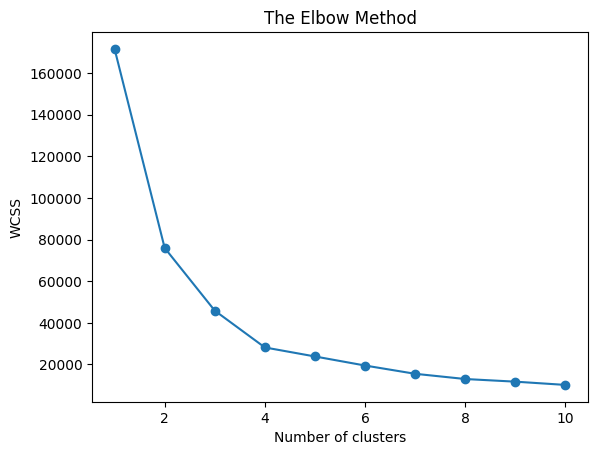

In [26]:
elbowOptimizer(X1)

For n_clusters = 2, the average silhouette score is: 0.4692341232501655
For n_clusters = 3, the average silhouette score is: 0.45300127016521263
For n_clusters = 4, the average silhouette score is: 0.49973941540141753
For n_clusters = 5, the average silhouette score is: 0.43167500325197866
For n_clusters = 6, the average silhouette score is: 0.44092943301338033
For n_clusters = 7, the average silhouette score is: 0.42313509747504796
For n_clusters = 8, the average silhouette score is: 0.4303437624300633
For n_clusters = 9, the average silhouette score is: 0.4100607745328945


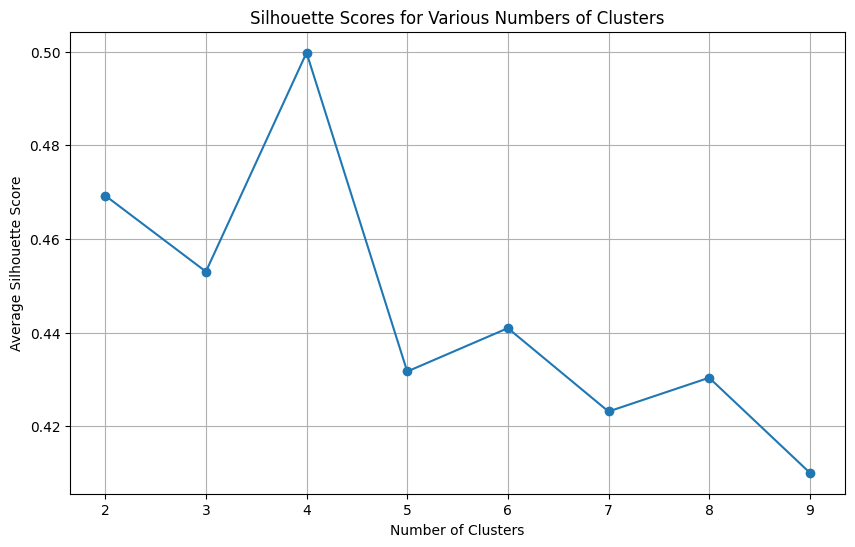

In [24]:
shsr(X1)

In [33]:
kmeans, labels = kmeansTrainer(4, X1)

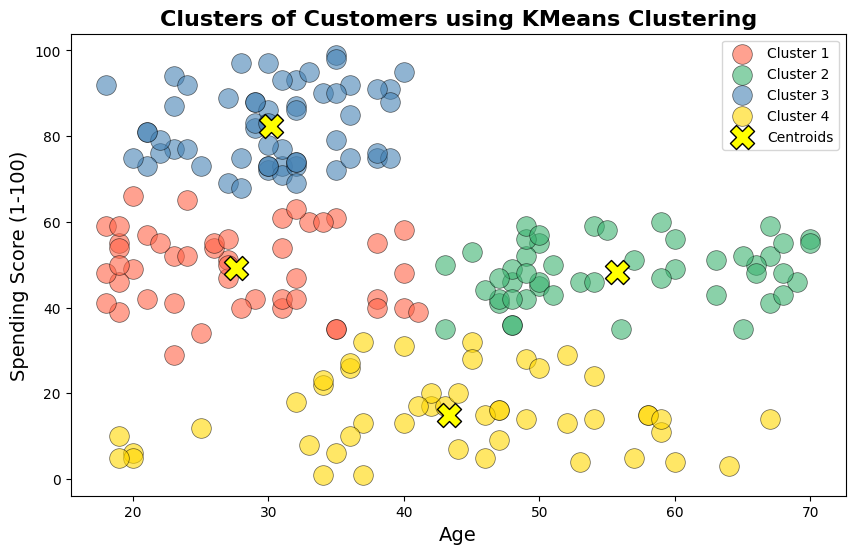

In [37]:
clusterVisualiser(X1, kmeans, 4, labels,
                  'Age', 'Spending Score (1-100)')

## 2D Clustering based on Annual Income and Spending Score

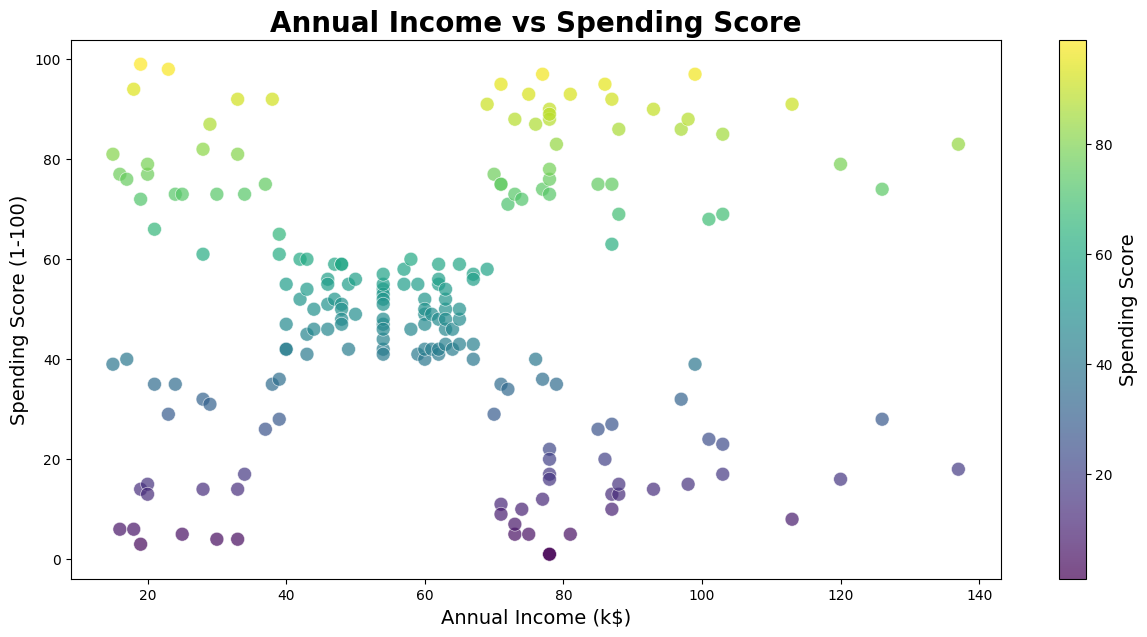

In [46]:
plt.figure(1, figsize=(15, 7))
plt.title('Annual Income vs Spending Score', fontsize=20, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)

plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, s=100, c=df['Spending Score (1-100)'],
            cmap='viridis', alpha=0.7, edgecolor='w', linewidth=0.5)
cbar = plt.colorbar()
cbar.set_label('Spending Score', fontsize=14)

plt.show()

Deciding K value


In [38]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

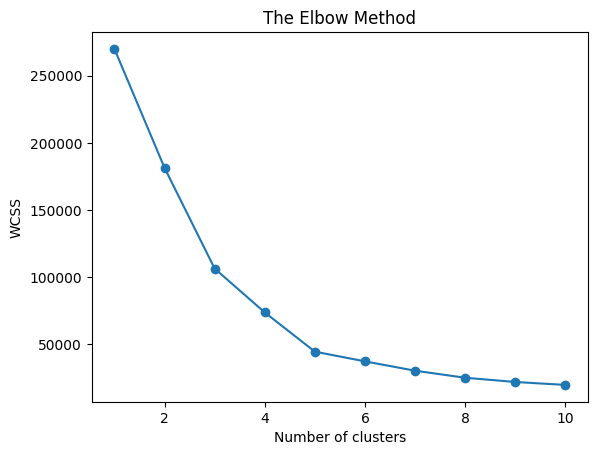

In [39]:
elbowOptimizer(X2)

For n_clusters = 2, the average silhouette score is: 0.2968969162503008
For n_clusters = 3, the average silhouette score is: 0.46761358158775435
For n_clusters = 4, the average silhouette score is: 0.4931963109249047
For n_clusters = 5, the average silhouette score is: 0.553931997444648
For n_clusters = 6, the average silhouette score is: 0.5379675585622219
For n_clusters = 7, the average silhouette score is: 0.5264283703685728
For n_clusters = 8, the average silhouette score is: 0.4551839202075395
For n_clusters = 9, the average silhouette score is: 0.4595491760122954


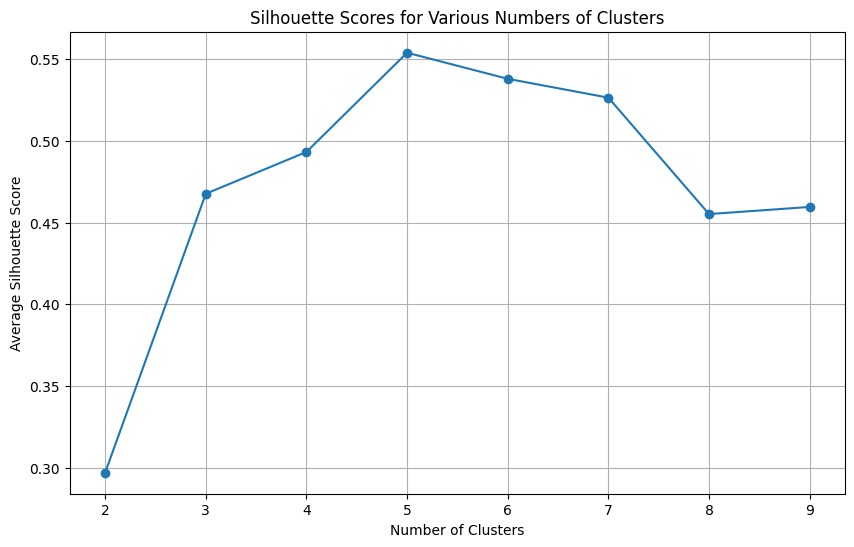

In [41]:
shsr(X2)

In [42]:
kmeans, labels = kmeansTrainer(5, X2)

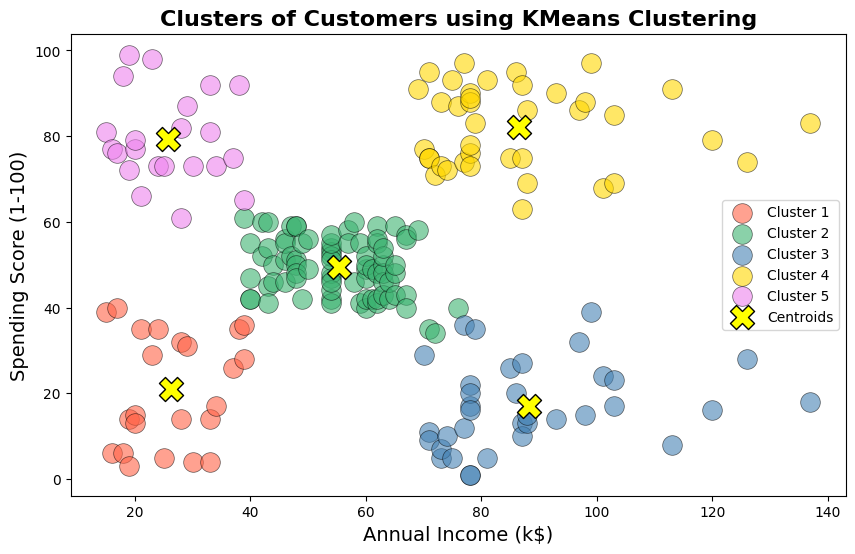

In [43]:
clusterVisualiser(X2, kmeans, 5, labels,
                  'Annual Income (k$)' , 'Spending Score (1-100)')

## 3D Clustering based on Age , Annual Income and Spending Score

In [47]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values

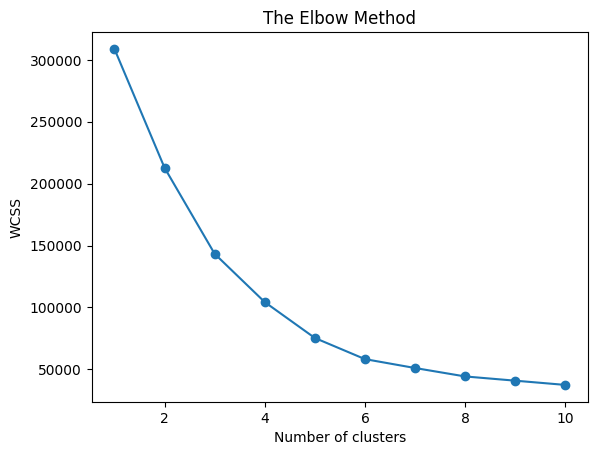

In [48]:
elbowOptimizer(X3)

For n_clusters = 2, the average silhouette score is: 0.293166070535953
For n_clusters = 3, the average silhouette score is: 0.3839349967742105
For n_clusters = 4, the average silhouette score is: 0.40546302077733304
For n_clusters = 5, the average silhouette score is: 0.44428597560893024
For n_clusters = 6, the average silhouette score is: 0.4523566166018854
For n_clusters = 7, the average silhouette score is: 0.43978902692261157
For n_clusters = 8, the average silhouette score is: 0.42790288922594905
For n_clusters = 9, the average silhouette score is: 0.38796879020944275


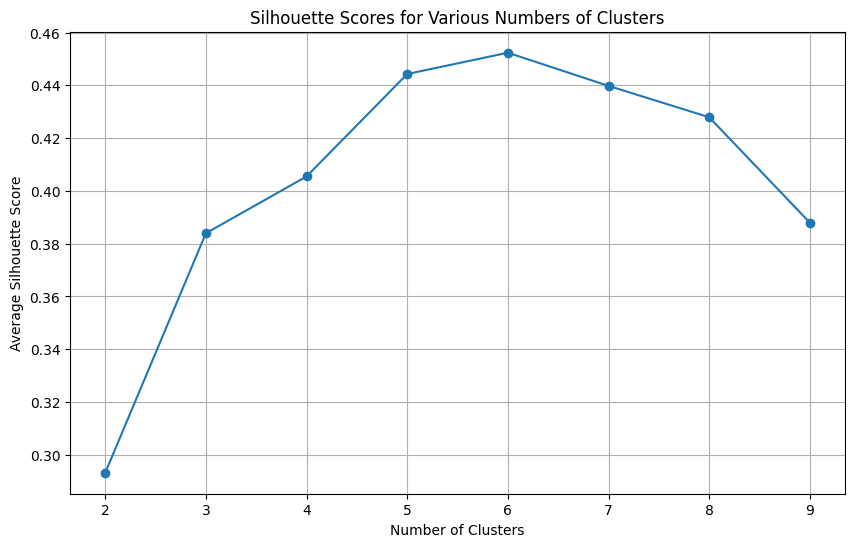

In [49]:
shsr(X3)

In [83]:
kmeans, labels = kmeansTrainer(6, X3)
df['cluster'] = pd.DataFrame(labels)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,3
2,3,Female,20,16,6,5
3,4,Female,23,16,77,3
4,5,Female,31,17,40,5


In [97]:
cluster_names = {
    0: 'Cluster 0',
    1: 'Cluster 1',
    2: 'Cluster 2',
    3: 'Cluster 3',
    4: 'Cluster 4',
    5: 'Cluster 5'
}

# Calculate customer count for each cluster
cluster_counts = df['cluster'].value_counts().sort_index()

# Create a separate trace for each cluster
traces = []
for cluster_id, name in cluster_names.items():
    cluster_data = df[df['cluster'] == cluster_id]
    trace = go.Scatter3d(
        x=cluster_data['Age'],
        y=cluster_data['Spending Score (1-100)'],
        z=cluster_data['Annual Income (k$)'],
        mode='markers',
        name=f"{name} ({cluster_counts[cluster_id]} customers)",
        marker=dict(
            size=10,
            line=dict(
                color='rgba(255, 255, 255, 0.5)',
                width=0.5
            ),
            opacity=0.8
        )
    )
    traces.append(trace)

layout = go.Layout(
    title='Clusters for Age, Income and Spending Scores',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score'),
        zaxis=dict(title='Annual Income')
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    legend=dict(
        x=1.05,
        y=1,
        title=dict(text='Cluster')
    )
)

fig = go.Figure(data=traces, layout=layout)
py.offline.iplot(fig)


In [90]:
df.to_csv("Clustered.csv", index = False)